# LIS590DV Final Project - Group Athena
## Part1

In [1]:
%matplotlib inline

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from collections import Counter

1. Visualization of bus stops

In [70]:
stops_file = "GTFS Dataset/stops.csv"
data = {}
with open(stops_file, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    for column in header:
        data[column] = []
    for row in reader:
        for column, value in zip(header,row):
            data[column].append(value)

In [71]:
data.keys()

dict_keys(['stop_id', 'stop_lat', 'stop_url', 'parent_station', 'zone_id', 'stop_desc', 'stop_code', 'location_type', 'stop_lon', 'stop_name'])

In [72]:
len(data)

10

In [73]:
len(data["stop_id"])

2496

In [74]:
Counter(data["location_type"])

Counter({'0': 2496})

In [75]:
Counter(data["parent_station"])

Counter({'': 2496})

In [76]:
class Dataset:
    def __init__(self, data):
        self.data = data.copy()
        
    def convert(self, column, dtype):
        # YOUR CODE HERE
        self.data[column] = np.array(self.data[column], dtype=dtype)
        #raise NotImplementedError()
        
    def columns(self):
        # YOUR CODE HERE
        return self.data.keys()
        #raise NotImplementedError()
    
    def filter_eq(self, column, value):
        # YOUR CODE HERE
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
        #raise NotImplementedError()
    
    def filter_lt(self, column, value):
        # YOUR CODE HERE
        good = (self.data[column] < value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
        #raise NotImplementedError()
    
    def filter_gt(self, column, value):
        # YOUR CODE HERE
        good = (self.data[column] > value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
        #raise NotImplementedError()
    
    def filter_ne(self, column, value):
        # YOUR CODE HERE
        good = (self.data[column] != value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
        #raise NotImplementedError()
    
    def size(self):
        # YOUR CODE HERE
        for key in self.data:
            return self.data[key].size
        #raise NotImplementedError()

    def split(self, column):
        # YOUR CODE HERE
        new_datasets = {}
        for split_value in np.unique(self.data[column]):
            new_datasets[split_value] = self.filter_eq(column, split_value)
        return new_datasets
        #raise NotImplementedError()

    def stats(self):
        statistics = {}
        for key in self.data:
            if self.data[key].dtype not in ("float", "int"):
                continue
            values = self.data[key]
            statistics[key] = (values.min(), values.max(), values.std(), values.mean())
        return statistics
    
    def compare(self, other):
        stats1 = self.stats()
        stats2 = other.stats()
        for column in self.columns():
            if column not in stats1: continue
            print("Column '{0:25s}'".format(column))
            for s1, s2 in zip(stats1[column], stats2[column]):
                print("    {0} vs {1}".format(s1, s2))
    
    def plot(self, x_column, y_column):
        plt.plot(self.data[x_column], self.data[y_column], '.')

In [77]:
stops = Dataset(data)
value_types = {'stop_lat': 'float',
               'stop_lon': 'float',}
for v in stops.columns():
    stops.convert(v, value_types.get(v, "str"))

In [81]:
stops.stats()

{'stop_lat': (40.048065185546882,
  40.152766,
  0.018075686742551746,
  40.109798700297411),
 'stop_lon': (-88.322874999999996,
  -88.159993999999998,
  0.039243117342072247,
  -88.242221875458313)}

In [78]:
plt.rcParams["figure.figsize"] = (10, 10)

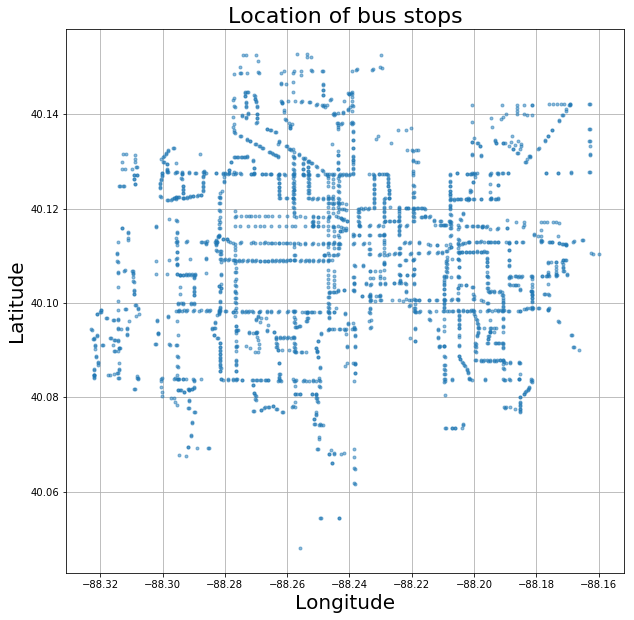

In [80]:
plt.plot(data["stop_lon"], data["stop_lat"], ".", alpha = 0.5)
plt.xlabel("Longitude",fontsize=20)
plt.ylabel("Latitude",fontsize=20)
plt.title("Location of bus stops",fontsize=22)
plt.grid(True)

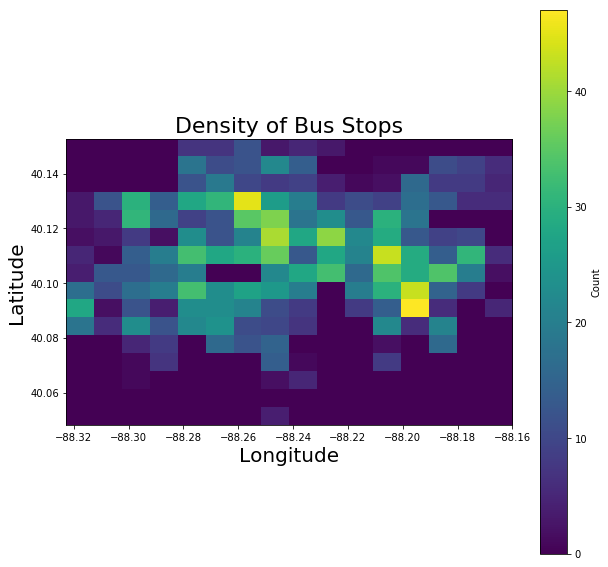

In [84]:
    stats = stops.stats()
    lon_min = stats["stop_lon"][0]
    lon_max = stats["stop_lon"][1]
    lat_min = stats["stop_lat"][0]
    lat_max = stats["stop_lat"][1]
    def bin_stops(num_bins = 16):
        lon = np.mgrid[lon_min:lon_max:(num_bins+1)*1j]
        lat = np.mgrid[lat_min:lat_max:(num_bins+1)*1j]

        stop_count = np.zeros((num_bins, num_bins))
        for i in range(num_bins):
            left_lat = lat[i]
            right_lat = lat[i+1]
            filter_lat_left = stops.filter_gt("stop_lat", left_lat)
            filter_lat_right = filter_lat_left.filter_lt("stop_lat", right_lat)
            for j in range(num_bins):
                left_lon = lon[j]
                right_lon = lon[j+1]
                filter_lon_left = filter_lat_right.filter_gt("stop_lon", left_lon)
                filter_lon_right = filter_lon_left.filter_lt("stop_lon", right_lon)
                stop_count[i,j] += filter_lon_right.size()

        plt.imshow(stop_count, extent=(lon_min,lon_max,lat_min,lat_max), origin="lower")
        plt.xlabel("Longitude",fontsize=20)
        plt.ylabel("Latitude",fontsize=20)
        plt.title("Density of Bus Stops", fontsize=22)
        color_bar = plt.colorbar()
        color_bar.set_label("Count")
        
    bin_stops()